### White-box Evasion attacks (40m)
In this part of the assignment, you will be training your own model for an image classification task and implementing white-box adversarial attacks to confuse the model. Please refer to resources 1, 2, and 3 for more information and code examples.


Tasks
1. Download the MNIST dataset, and train a deep learning model of your own from scratch for this dataset. You must write a report on your classification accuracy for the train and test data. (5m)
2. Pick an image x from the dataset. Create xadv using the methods shown listed below. Visualize and compare the images x, xadv , and the adversarial noise
δ = xadv − x in your report (refer to the image above). Also, report the Losses L(x, yoriginal−label); θ) (where θ refers to the model parameters),
L(xadv,yoriginal−label);θ)and L(xadv,ychanged−label);θ)along with the predicted label achieved after the attack. Assume the default attack budget ε
to be 0.2, feel free to play around with more values of ε. (15m) 

    a) Fast Gradient Sign Method (FGSM)

        i. Untargeted 

        ii. Targeted
    b) Projected Gradient Descent (PDG) 

        i. Untargeted
    
        ii. Targeted

    
3. Apply all the above attacks on the test set using 3 or more different budget-𝜖 values (any 3 values from 0.05 to 0.3). Report the test accuracies for these 3 cases in all the 4 scenarios. (10m)


<img src="/Users/hrithik/Library/CloudStorage/OneDrive-InternationalInstituteofInformationTechnology/S24/RSAI/S24-RSAI-Asgn-1-Poisioning-Attack/Task 2/Screenshot 2024-02-17 at 19.57.59.png" alt="Table">

1. Answer the following questions. support your answers with empirical evidence and plots. (10m)

a) Plot and analyze the accuracy change with respect to each of the epsilon values. How do the images change for each of these values? Will a higher epsilon value mean a good attack? If not, why?

b) Which attack is the best? List down the pros and cons of each attack. When would you use a targeted attack vs an untargeted attack?

5. (BONUS) Perform Adversarial training on your model and report the new accuracies (20m)

Resources:
1. https://adversarial-ml-tutorial.org/introduction/
2. https://pytorch.org/tutorials/beginner/fgsm_tutorial.html 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define a simple CNN model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training the model
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:  # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

# Evaluate the model on test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


/opt/homebrew/Caskroom/miniforge/base/envs/venv1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 9912422/9912422 [00:01<00:00, 6311450.00it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31702615.50it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1218891.24it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6912383.44it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Finished Training
Accuracy of the network on the 10000 test images: 98 %


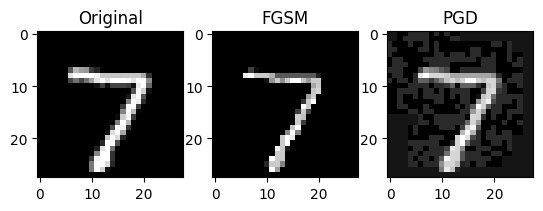

Original Loss: 0.00015090758097358048
FGSM Loss: 2.14235258102417
PGD Loss: 0.20758511126041412
Original Labels: tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])
FGSM Predicted Labels: tensor([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])
FGSM Predicted Outputs: tensor([[-0.4319, -2.8434,  0.3864,  2.3953, -2.5583, -2.3451, -3.6755,  1.4188,
          2.8630, -1.5721],
        [-0.4319, -2.8434,  0.3864,  2.3953, -2.5583, -2.3451, -3.6755,  1.4188,
          2.8630, -1.5721],
        [-0.4319, -2.8434,  0.3864,  2.3953, -2.5583, -2.3451, -3.6755,  1.4188,
          2.8630, -1.5721],
        [-0.4319, -2.8434,  0.3864,  2.3953, -2.5583, -2.3451, -3.6755,  1.4188

In [42]:
# Implement Fast Gradient Sign Method (FGSM)
def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

# Implement Projected Gradient Descent (PGD)
def pgd_attack(image, epsilon, data_grad, alpha, num_steps):
    perturbed_image = image.clone().detach()
    for _ in range(num_steps):
        perturbed_image.requires_grad = True
        output = net(perturbed_image)
        loss = criterion(output, true_label)
        net.zero_grad()
        loss.backward()
        data_grad = perturbed_image.grad.data
        perturbed_image = perturbed_image + alpha * torch.sign(data_grad)
        perturbed_image = torch.max(torch.min(perturbed_image, image + epsilon), image - epsilon).detach()
    return perturbed_image

# Choose an image from the dataset
# Choose an image from the dataset
# image, true_label = testset[0][0].unsqueeze(0), torch.tensor([testset[0][1]])  # Convert true_label to tensor
image, true_label = testset[0][0].unsqueeze(0).repeat(64, 1, 1, 1), torch.tensor([testset[0][1]] * 64)  # Convert true_label to tensor

# FGSM Attack
epsilon = 0.2
image.requires_grad = True
output = net(image)
loss = criterion(output, true_label)  # Ensure true_label is a tensor
net.zero_grad()
loss.backward()
data_grad = image.grad.data
perturbed_image_fgsm = fgsm_attack(image, epsilon, data_grad)

# PGD Attack
alpha = 0.01
num_steps = 40
perturbed_image_pgd = pgd_attack(image, epsilon, data_grad, alpha, num_steps)

# Visualize and compare images
import matplotlib.pyplot as plt

# fig, axs = plt.subplots(1, 3)
# axs[0].imshow(image.squeeze().detach().numpy(), cmap='gray')
# axs[0].set_title('Original')

# axs[1].imshow(perturbed_image_fgsm.squeeze().detach().numpy(), cmap='gray')
# axs[1].set_title('FGSM')

# axs[2].imshow(perturbed_image_pgd.squeeze().detach().numpy(), cmap='gray')
# axs[2].set_title('PGD')

# plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(image[0].squeeze().detach().numpy(), cmap='gray')  # Select the first image from the batch
axs[0].set_title('Original')

axs[1].imshow(perturbed_image_fgsm[0].squeeze().detach().numpy(), cmap='gray')  # Select the first perturbed image from the batch
axs[1].set_title('FGSM')

axs[2].imshow(perturbed_image_pgd[0].squeeze().detach().numpy(), cmap='gray')  # Select the first perturbed image from the batch
axs[2].set_title('PGD')

plt.show()


# Evaluate the model on perturbed images
output_fgsm = net(perturbed_image_fgsm)
output_pgd = net(perturbed_image_pgd)
_, predicted_fgsm = torch.max(output_fgsm, 1)
_, predicted_pgd = torch.max(output_pgd, 1)

loss_original = criterion(output, true_label)
loss_fgsm = criterion(output_fgsm, true_label)
loss_pgd = criterion(output_pgd, true_label)

print("Original Loss:", loss_original.item())
print("FGSM Loss:", loss_fgsm.item())
print("PGD Loss:", loss_pgd.item())

# print("Original Label:", true_label.item())
print("Original Labels:", true_label)
# print("FGSM Predicted Label:", predicted_fgsm.item())
print("FGSM Predicted Labels:", predicted_fgsm)
print("FGSM Predicted Outputs:", output_fgsm)


# print("PGD Predicted Label:", predicted_pgd.item())
print("PGD Predicted Label:", predicted_pgd)


epsilons = [0.05, 0.15, 0.25]  # different values of epsilon
print("FGSM Predicted Outputs Shape:", output_fgsm.shape)
print("FGSM Predicted Labels Shape:", predicted_fgsm.shape)
print("FGSM Predicted Labels:")
for label in predicted_fgsm:
    print(label.item())




In [43]:
# def test_attack(attack_fn, attack_name, testloader, epsilon, alpha=None, num_steps=None):
#     correct = 0
#     total = 0
#     for images, labels in testloader:
#         images.requires_grad = True
#         outputs = net(images)
#         batch_size = images.size(0)
#         expanded_labels = labels.repeat(outputs.size(1))  # Repeat labels to match the number of classes
#         if expanded_labels.size(0) != outputs.size(0):
#             expanded_labels = expanded_labels[:outputs.size(0)]
#         loss = criterion(outputs, expanded_labels)  # Calculate loss using expanded labels
#         net.zero_grad()
#         loss.backward()
#         data_grad = images.grad.data
#         if attack_fn == fgsm_attack:
#             perturbed_images = attack_fn(images, epsilon, data_grad)
#         elif attack_fn == pgd_attack:
#             perturbed_images = attack_fn(images, epsilon, data_grad, alpha, num_steps)
#         perturbed_outputs = net(perturbed_images)
#         _, predicted = torch.max(perturbed_outputs, 1)
#         total += batch_size
#         correct += (predicted == labels).sum().item()
#     accuracy = 100 * correct / total
#     return accuracy


def test_attack(attack_fn, attack_name, testloader, epsilon, alpha=None, num_steps=None):
    correct = 0
    total = 0
    for images, labels in testloader:
        images.requires_grad = True
        outputs = net(images)
        batch_size = images.size(0)
        num_classes = outputs.size(1)
        expanded_labels = labels.repeat(1, num_classes)  # Repeat labels to match the number of classes
        loss = criterion(outputs, expanded_labels)  # Calculate loss using expanded labels
        net.zero_grad()
        loss.backward()
        data_grad = images.grad.data
        if attack_fn == fgsm_attack:
            perturbed_images = attack_fn(images, epsilon, data_grad)
        elif attack_fn == pgd_attack:
            perturbed_images = attack_fn(images, epsilon, data_grad, alpha, num_steps)
        
        perturbed_outputs = net(perturbed_images)
        perturbed_outputs = perturbed_outputs[:batch_size]  # Truncate to original batch size
        expanded_labels = expanded_labels[:batch_size]  # Truncate labels to original batch size
        loss = criterion(perturbed_outputs, expanded_labels)  # Recalculate loss with truncated outputs and labels

        _, predicted = torch.max(perturbed_outputs, 1)
        total += batch_size
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy


# FGSM Untargeted
print("FGSM Untargeted:")
for epsilon in epsilons:
    accuracy = test_attack(fgsm_attack, "FGSM", testloader, epsilon)
    print("Epsilon:", epsilon, "Accuracy:", accuracy)

# PGD Untargeted
print("\nPGD Untargeted:")
for epsilon in epsilons:
    accuracy = test_attack(pgd_attack, "PGD", testloader, epsilon, alpha=0.01, num_steps=40)
    print("Epsilon:", epsilon, "Accuracy:", accuracy)

FGSM Untargeted:


ValueError: Expected input batch_size (64) to match target batch_size (1).